       YEAR  MO  DY  HR   T2M    RH2M  PRECTOTCORR      PS  WS50M
0      2018   1   1   0  6.20   92.69         0.06   98.67  13.98
1      2018   1   1   1  5.65   90.69         0.01   98.90  14.07
2      2018   1   1   2  4.95   92.25         0.04   99.03  12.05
3      2018   1   1   3  4.70   94.31         0.18   99.06  11.05
4      2018   1   1   4  4.79   94.62         0.14   99.00  10.74
...     ...  ..  ..  ..   ...     ...          ...     ...    ...
43843  2023   1   1  19  7.11   98.69         0.05  100.00   5.96
43844  2023   1   1  20  6.44  100.00         0.02  100.01   5.09
43845  2023   1   1  21  5.96  100.00         0.02   99.98   4.83
43846  2023   1   1  22  5.84  100.00         0.02   99.97   4.80
43847  2023   1   1  23  5.93  100.00         0.02   99.98   4.87

[43848 rows x 9 columns]
                     Temperature  Humidity  Precipitation  Pressure  \
datetime                                                              
2018-01-01 00:00:00         6.20     92.

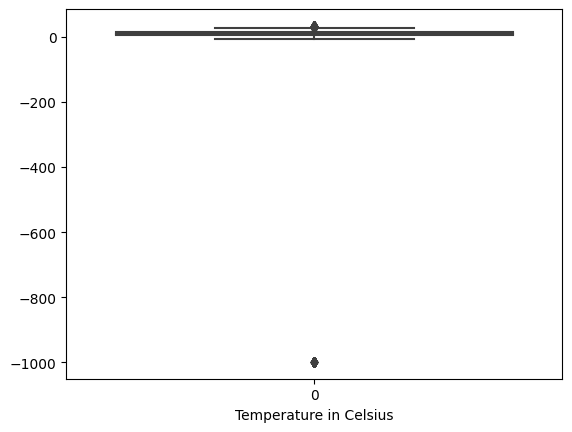

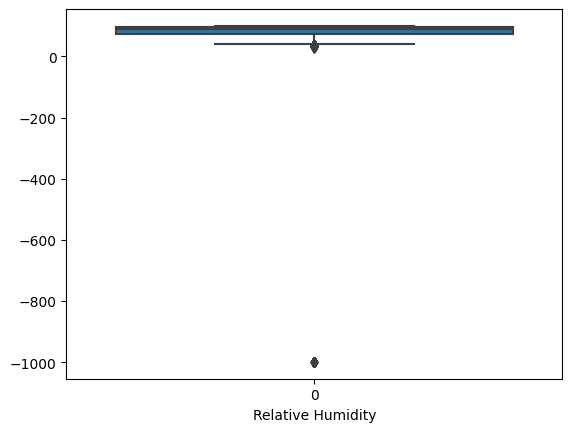

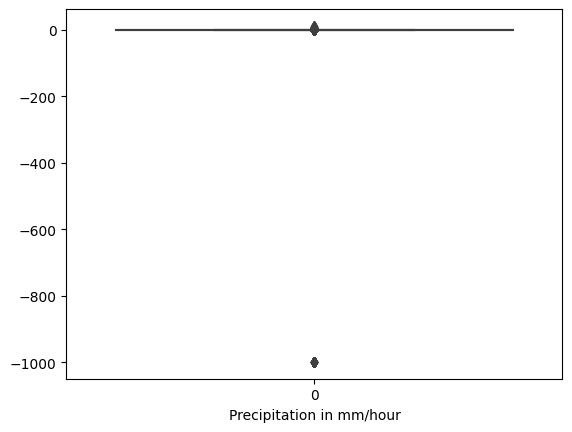

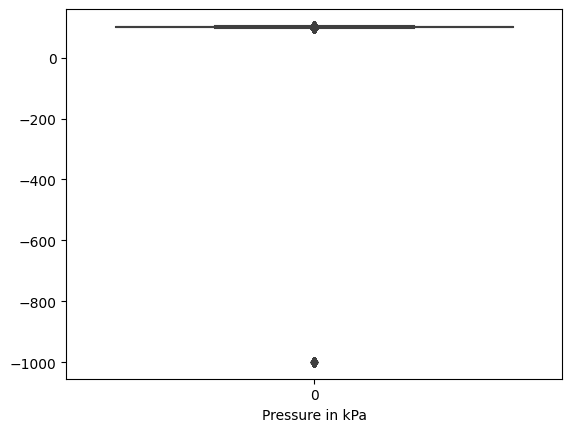

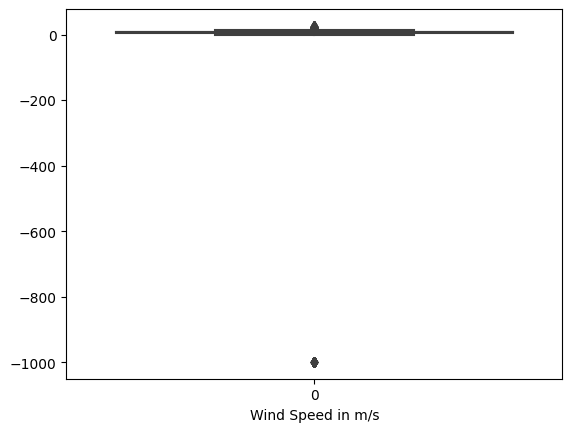

Temperature      72
Humidity         72
Precipitation    72
Pressure         72
Wind Speed       72
dtype: int64
                     Temperature  Humidity  Precipitation  Pressure  \
datetime                                                              
2022-11-18 00:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-18 01:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-18 02:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-18 03:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-18 04:00:00       -999.0    -999.0         -999.0    -999.0   
...                          ...       ...            ...       ...   
2022-11-20 19:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-20 20:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-20 21:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-20 22:00:00       -999.0    -999.0         -999.0    -999.0   
2022-11-20 23:00:00       -999.0   

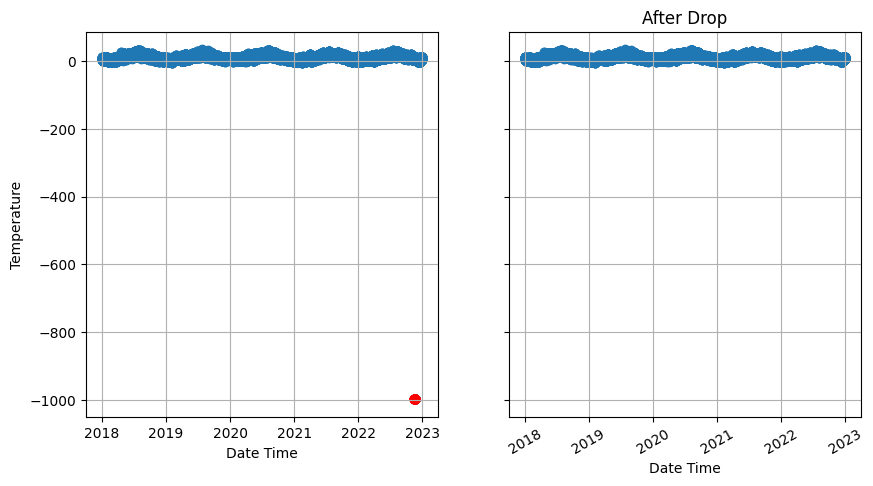

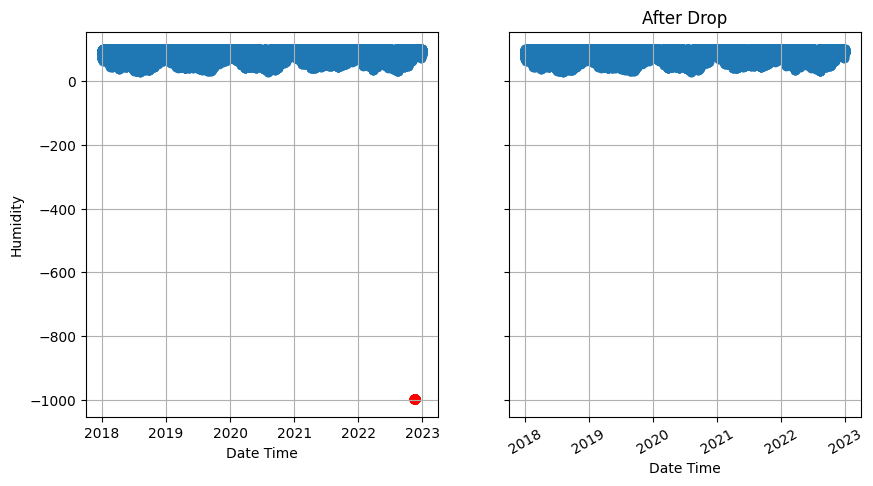

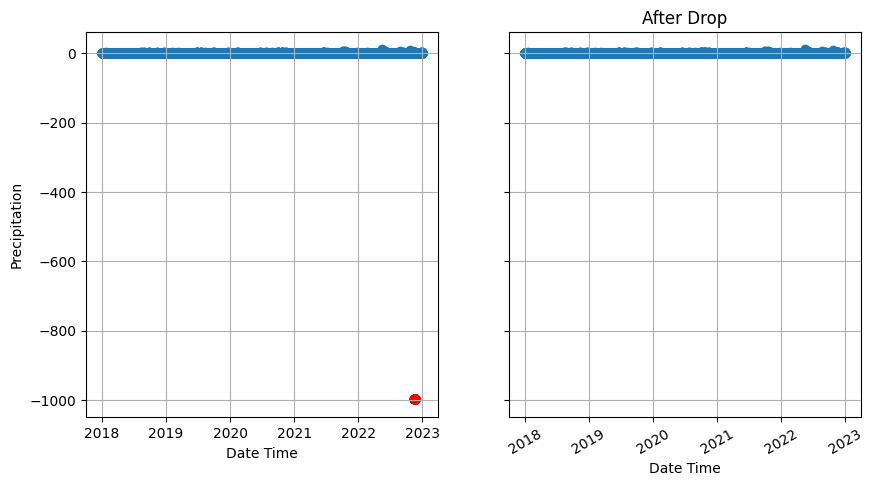

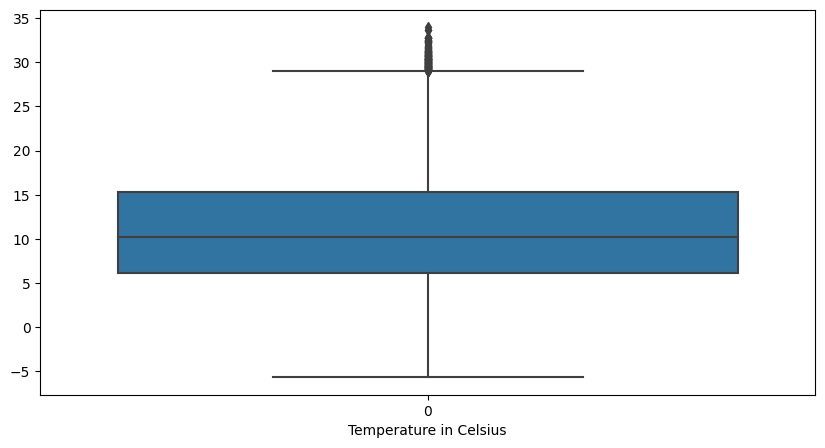

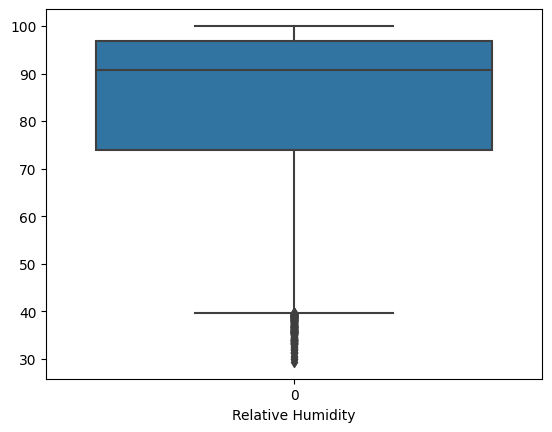

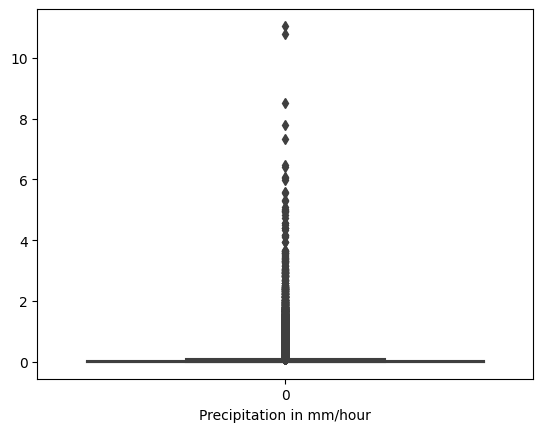

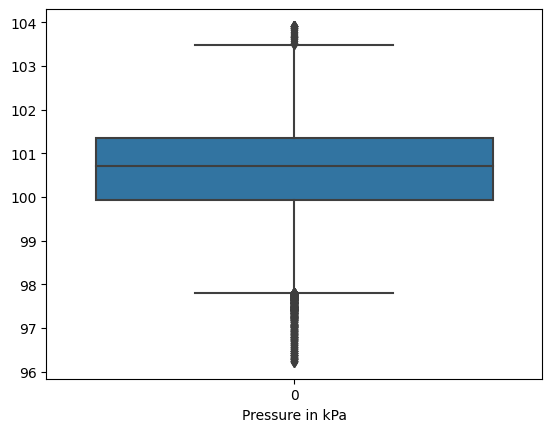

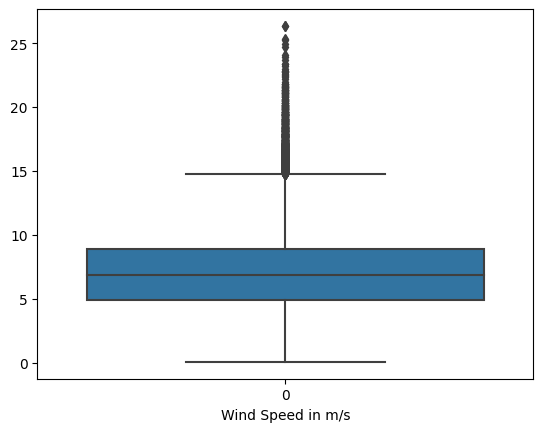

                     Temperature  Humidity  Precipitation  Pressure  \
datetime                                                              
2022-05-18 20:00:00        13.30     95.56          11.05    100.77   
2022-05-18 21:00:00        13.36     95.62          10.78    100.64   
2022-10-23 06:00:00        14.64     96.31           8.53     99.47   
2022-05-18 19:00:00        14.51     89.44           7.79    100.78   
2021-10-20 21:00:00        12.01     98.31           7.32     97.88   
2022-06-05 04:00:00        10.83     95.81           6.48    100.63   
2021-10-05 03:00:00        12.98     94.06           6.40     98.78   
2022-06-05 05:00:00        11.08     95.44           6.07    100.54   
2022-05-18 22:00:00        13.19     96.56           6.05    100.55   
2022-10-23 05:00:00        14.58     95.56           5.97     99.59   
2021-10-20 20:00:00        11.94     98.38           5.60     98.08   
2022-10-23 07:00:00        14.93     96.25           5.56     99.38   
2021-1

In [1]:
import main as m

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import SGD

2023-02-23 18:13:09.615121: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df = m.filter_data

In [4]:
# Split the data into input and target arrays for temperature prediction
X_temp = df[['Precipitation', 'Humidity', 'Pressure', 'Wind Speed']].values
y_temp = df['Temperature'].values

# Split the data into input and target arrays for precipitation prediction
X_prec = df[['Temperature', 'Humidity', 'Pressure', 'Wind Speed']].values
y_prec = df['Precipitation'].values


In [5]:
# We split the dataset into a training and test set.

#For Temperature:

x_temp_train , x_temp_test , y_temp_train , y_temp_test = train_test_split(X_temp, y_temp, test_size =0.2, random_state=42)

#For Precipitation

x_prec_train , x_prec_test , y_prec_train , y_prec_test = train_test_split(X_prec, y_prec, test_size =0.2, random_state=42)

In [6]:
# We reshape y_train and y_test since train_test_split
# outputs them as (nr_samples,) but we need
# (nr_samples ,1)

#for temperature
y_temp_train = y_temp_train.reshape((-1,1))
y_temp_test = y_temp_test.reshape((-1,1))

#for precipitation

y_prec_train = y_prec_train.reshape((-1,1))
y_prec_test = y_prec_test.reshape((-1,1))


In [7]:
#Now we reserve the test set and perform all
# preprocessing and training with the train set only. # The first preprocessing step is to stantardise our # features and target.
x_scaler = StandardScaler()
y_scaler = StandardScaler()

x_temp_train = x_scaler.fit_transform(x_temp_train)
x_prec_train = x_scaler.fit_transform(x_prec_train)

y_temp_train = y_scaler.fit_transform(y_temp_train)
y_prec_train = y_scaler.fit_transform(y_prec_train)

#test

x_temp_test = x_scaler.transform(x_temp_test)
x_prec_test = x_scaler.transform(x_prec_test)

y_temp_test = y_scaler.transform(y_temp_test)
y_prec_test = y_scaler.transform(y_prec_test)

In [8]:
x_temp_train.shape

(35060, 4)

In [9]:
#data transdormation for LSTM
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

x_temp_train = np.reshape(x_temp_train, (x_temp_train.shape[0], 1, x_temp_train.shape[1]))
x_temp_test = np.reshape(x_temp_test, (x_temp_test.shape[0], 1, x_temp_test.shape[1]))

x_prec_train = np.reshape(x_prec_train, (x_prec_train.shape[0], 1, x_prec_train.shape[1]))
x_prec_test = np.reshape(x_prec_test, (x_prec_test.shape[0], 1, x_prec_test.shape[1]))



In [10]:
x_prec_test.shape

(8765, 1, 4)

In [11]:
#build the neural network
batch_size =64 
epochs = 50

modelT = Sequential()
modelT.add(LSTM(16, input_shape =(1,4)))
modelT.add(Dropout(0.2))
modelT.add(Dense(64, activation="relu"))
modelT.add(Dropout(0.2))
modelT.add(Dense(64, activation="relu")) 
modelT.add(Dropout(0.2))
modelT.add(Dense(1, activation="linear"))

modelP = Sequential()
modelP.add(LSTM(16, input_shape = (1,4)))
modelP.add(Dropout(0.2))
modelP.add(Dense(64, activation="relu"))
modelP.add(Dropout(0.2))
modelP.add(Dense(64, activation="relu")) 
modelP.add(Dropout(0.2))
modelP.add(Dense(1, activation="linear"))


2023-02-23 18:13:13.952551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
#complie the methode
# We use a Mean Squared Error - mse - loss.

modelT.compile(loss="mse", optimizer=SGD())
historicalT = modelT.fit(x_temp_train , y_temp_train , batch_size=batch_size , epochs=epochs, verbose=1, validation_split=0.1)



Epoch 1/50
494/494 [==============================] - 4s 3ms/step - loss: 0.9238 - val_loss: 1.2444
Epoch 2/50
494/494 [==============================] - 1s 2ms/step - loss: 0.7290 - val_loss: 0.6376
Epoch 3/50
494/494 [==============================] - 1s 2ms/step - loss: 0.2148 - val_loss: 0.0228
Epoch 4/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0910 - val_loss: 0.0169
Epoch 5/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0955 - val_loss: 0.0364
Epoch 6/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0859 - val_loss: 0.0177
Epoch 7/50
494/494 [==============================] - 1s 3ms/step - loss: 0.0864 - val_loss: 0.0156
Epoch 8/50
494/494 [==============================] - 1s 3ms/step - loss: 0.0995 - val_loss: 0.0148
Epoch 9/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0773 - val_loss: 0.0214
Epoch 10/50
494/494 [==============================] - 1s 2ms/step - loss: 0.1450 - val_loss: 0.0158

In [13]:
modelP.compile(loss="mse", optimizer=SGD())
historicalP = modelP.fit(x_prec_train , y_prec_train , batch_size=batch_size , epochs=epochs, verbose=1, validation_split=0.1)

Epoch 1/50
494/494 [==============================] - 3s 3ms/step - loss: 0.9192 - val_loss: 1.2257
Epoch 2/50
494/494 [==============================] - 1s 2ms/step - loss: 0.6338 - val_loss: 0.3188
Epoch 3/50
494/494 [==============================] - 1s 2ms/step - loss: 0.1237 - val_loss: 0.0127
Epoch 4/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0680 - val_loss: 3.5064e-04
Epoch 5/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0993 - val_loss: 0.0045
Epoch 6/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0761 - val_loss: 0.0315
Epoch 7/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0743 - val_loss: 0.0110
Epoch 8/50
494/494 [==============================] - 1s 2ms/step - loss: 0.1072 - val_loss: 0.0081
Epoch 9/50
494/494 [==============================] - 1s 3ms/step - loss: 0.0970 - val_loss: 0.0022
Epoch 10/50
494/494 [==============================] - 1s 2ms/step - loss: 0.0690 - val_loss: 0.

In [14]:
#evaluation
modelT.evaluate(x_temp_test , y_temp_test)

modelP.evaluate(x_prec_test , y_prec_test)

274/274 [==============================] - 0s 1ms/step - loss: 0.0117


0.011668434366583824

In [15]:
import matplotlib.pyplot as plt

In [16]:
historicalT.history

{'loss': [0.9238051176071167,
  0.7290329933166504,
  0.21477094292640686,
  0.09095271676778793,
  0.09545743465423584,
  0.08593158423900604,
  0.08644469827413559,
  0.09954819828271866,
  0.07727386057376862,
  0.14504987001419067,
  0.07303227484226227,
  0.08225685358047485,
  0.09935121983289719,
  0.09462226927280426,
  0.08364187926054001,
  0.08983886241912842,
  0.07364893704652786,
  0.06731710582971573,
  0.0870906412601471,
  0.09316150099039078,
  0.0849107876420021,
  0.0811353549361229,
  0.07453072816133499,
  0.08695624023675919,
  0.06903871893882751,
  0.0910835713148117,
  0.06957496702671051,
  0.08382002264261246,
  0.08585955947637558,
  0.06566806137561798,
  0.07459292560815811,
  0.07072021812200546,
  0.08480902016162872,
  0.061872612684965134,
  0.0871739387512207,
  0.05705653876066208,
  0.0711815357208252,
  0.06439879536628723,
  0.06794510036706924,
  0.08977440744638443,
  0.06253759562969208,
  0.08092120289802551,
  0.061063580214977264,
  0.04410

In [17]:
historicalP.history

{'loss': [0.9191669821739197,
  0.6338094472885132,
  0.12367154657840729,
  0.06801574677228928,
  0.09931612759828568,
  0.07612452656030655,
  0.07434745877981186,
  0.1071874126791954,
  0.0969693660736084,
  0.06901579350233078,
  0.0808020681142807,
  0.061751920729875565,
  0.05315713956952095,
  0.06929721683263779,
  0.05697544664144516,
  0.08941284567117691,
  0.05454009771347046,
  0.07082273811101913,
  0.062242764979600906,
  0.05954771861433983,
  0.0611022487282753,
  0.034976597875356674,
  0.039087798446416855,
  0.0721694752573967,
  0.07522845268249512,
  0.0722188726067543,
  0.06548188626766205,
  0.05384742468595505,
  0.04820805788040161,
  0.05333881825208664,
  0.05596199259161949,
  0.05651665851473808,
  0.07080920040607452,
  0.059369031339883804,
  0.04934585466980934,
  0.05024410039186478,
  0.0552036426961422,
  0.050385043025016785,
  0.054529570043087006,
  0.06201261654496193,
  0.04210510104894638,
  0.04892979934811592,
  0.044397469609975815,
  0.

In [18]:
from keras.utils.vis_utils import plot_model

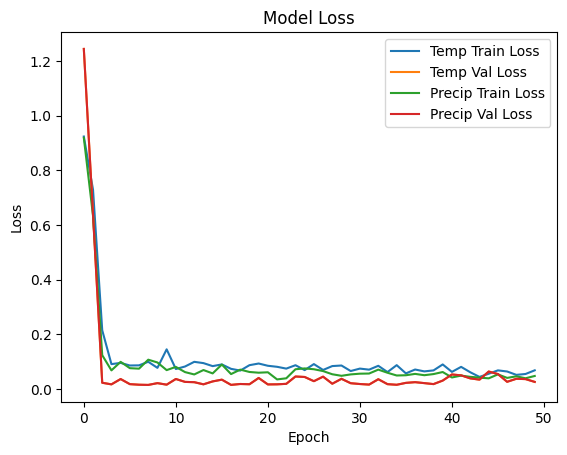

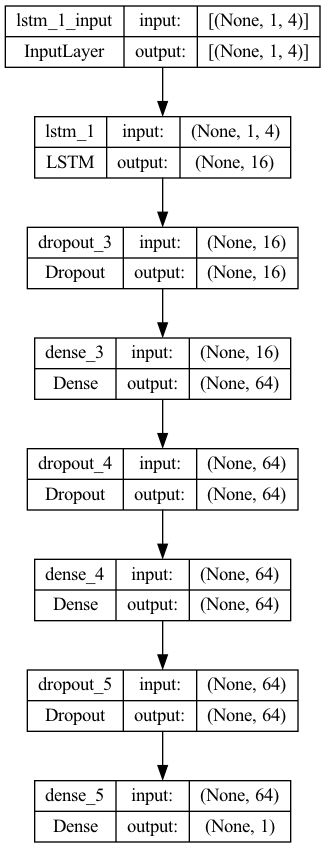

In [19]:
# Visualize model performance
plt.plot(historicalT.history['loss'], label='Temp Train Loss')
plt.plot(historicalT.history['val_loss'], label='Temp Val Loss')
plt.plot(historicalP.history['loss'], label='Precip Train Loss')
plt.plot(historicalT.history['val_loss'], label='Precip Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot model architectures
plot_model(modelT, to_file='model_temp.png', show_shapes=True, show_layer_names=True)
plot_model(modelP, to_file='model_precip.png', show_shapes=True, show_layer_names=True)
